In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# this is google collab stuff I need to add to access the files on my gdrive -JU
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/NIH_FAES/SPRING_2025/BIO_509_Machine_Learning_Class/Week_2")

Mounted at /content/drive/


## Part 1: Clustering with GMMs

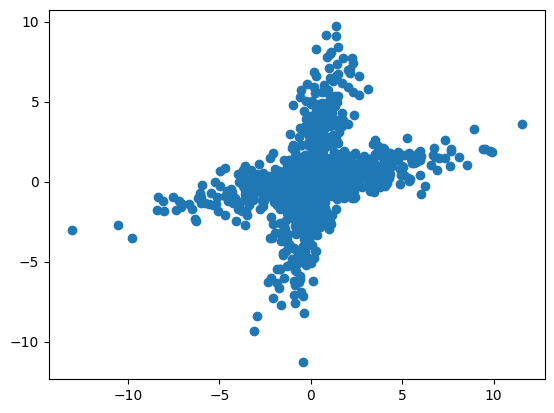

In [2]:
# Generate some data (adapted from https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html)

np.random.seed(12130) # ensure consistent results

# generate gaussian data

n_samples = 500
C = np.array([[-0.7, 0.0], [0.7, 3.5]])
gaussian_1 = np.dot(np.random.randn(n_samples, 2), C)

C = np.array([[0.0, -0.7], [3.5, 0.7]])
gaussian_2 = np.dot(np.random.randn(n_samples, 2), C)

# concatenate
data =  np.vstack([gaussian_1, gaussian_2])

plt.scatter(data[:,0], data[:,1])
plt.show()

**1. Use Scikit-Learn to fit a 2-component [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) to `data`. Remember to load the module!**
  - Hint: take a look at the exmaples in the documentation
  - Note: a GMM is an example of a model that doesn't need the data scaled, because it accounts for variance

In [3]:
# YOUR CODE HERE (1)
import numpy as np
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=0).fit(data)
gm # got the same n_components, but it also includes the random_state=0

GaussianMixture(n_components=2, random_state=0)

In [4]:
print(gm.means_) # got the same exact values as the example -JU
print(gm.covariances_)

[[0.0208993  0.20084198]
 [0.067253   0.08962513]]
[[[ 0.89435467  2.10162005]
  [ 2.10162005 12.29739628]]

 [[11.44792738  2.30969623]
  [ 2.30969623  0.99700261]]]


**2. Predict which of the two gaussians each point was generated from using the `predict()` function of our fitted GaussianMixture. Store these labels in `labels`.**

In [5]:
# YOUR CODE HERE (2)
labels = gm.predict(data)

[0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 

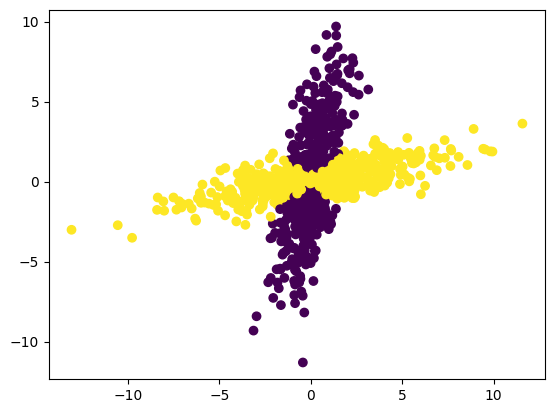

In [6]:
print(labels)
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

**3. Now generate 50 new data points using the `sample()` function of our fitted GaussianMixture object. Store the results in `(new_data, new_labels)`.**

In [7]:
# YOUR CODE HERE (3)
new_data, new_labels = gm.sample(n_samples=50)
# new_data = gm.sample(n_samples=50)[0]
# new_labels = gm.sample(n_samples=50)[1]

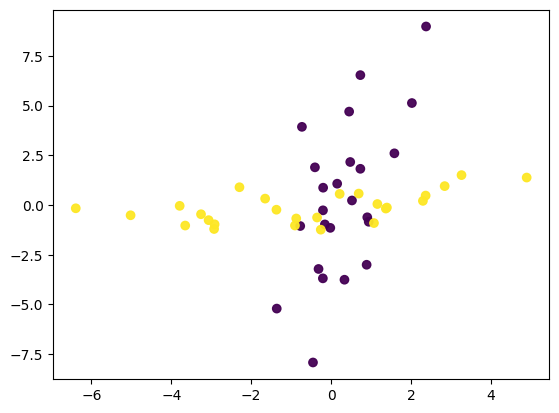

In [8]:
plt.scatter(new_data[:,0], new_data[:,1], c=new_labels, alpha=0.95)
plt.show()

## Part 2: Dimensional reduction with PCA
For PCA we will use the Scikit-Learn [breast cancer](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset) toy dataset. It has various attributes of cell nuclei as features. Each observation also has a label (benign or malignant), which we will not need to give to unsupervised algorithms but can use for visualization.

In [9]:
from sklearn.datasets import load_breast_cancer
(data, labels) = load_breast_cancer(return_X_y=True, as_frame=True)
display(data)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [29]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [10]:
display(labels)

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


**4. Use [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to normalize the data, using the `fit_transform()` function (remember to import the module). Store the scaled data in `scl`.**

In [11]:
# YOUR CODE HERE (4)
from sklearn.preprocessing import StandardScaler
scl = StandardScaler().fit_transform(data)

In [12]:
import statistics as stat
print("Col 0 mean: %f"%stat.mean(scl[:,0]))
print("Col 0 stddev: %f"%stat.stdev(scl[:,0]))

Col 0 mean: -0.000000
Col 0 stddev: 1.000880


**5. Using Scikit-learn, create a a PCA model called `pca` that keeps only the 2 components that explain the most variance. Fit the model to the *scaled* data. Remember to import the PCA module! (Hint: take a look at the examples in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html))**

In [13]:
# YOUR CODE HERE (5)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scl) # we created scl above using the StandardScalar().fit_transform(data)


PCA(n_components=2)

In [14]:
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182]


We see that these two components explain a lot of the variance, which means our variables are highly correlated and thus very redundant! Let's visualize with the known labels to see if our newly reduced features might be good for supervised learning.

**6. Transform the scaled data based on our PCA model and store it in `tfm`.**

In [15]:
# YOUR CODE HERE (6)
tfm = pca.transform(scl)

In [16]:
tfm.shape

(569, 2)

Now our data have the same number of observations but have been reduced to 2 dimensions.

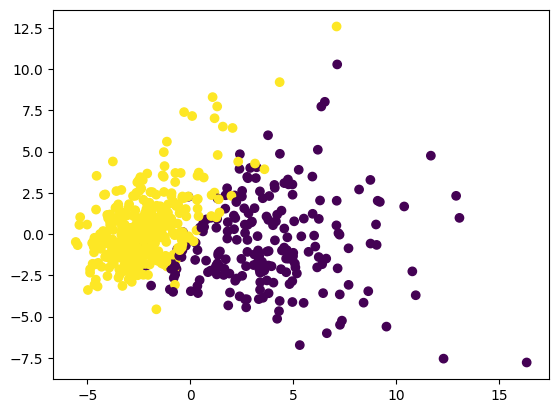

In [17]:
plt.scatter(tfm[:,0], tfm[:,1], c=labels)
plt.show()

Just using these two transformed variables, we could easily draw a line separating the two classes (benign and malignant). This will help us when we look at supervised learning!

## Part 3: Dimensional reduction with t-SNE for single-cell RNAseq

We'll load data from [Tabula Muris](https://www.nature.com/articles/s41586-018-0590-4). Each observation is a mouse brain cell, and the measurements are gene activity in the form of transcript quantities. The main table is a matrix of 3210 (observations) X 18585 (transcripts). We'll reduce the 18,585 dimensions down to 2 to visualize the data. There is also a metadata table with several attributes for each observation. We can use these to color the plot and look for interesting patterns.

In [18]:
df = pd.read_csv('data.csv', index_col=0)
df

,0,1,2,3,4,5,6,7,8,9,...,18575,18576,18577,18578,18579,18580,18581,18582,18583,18584
0,-0.08,0.79,1.33,-0.27,-0.42,-0.83,-0.47,-0.03,-0.60,-1.02,...,-0.72,-0.21,-0.19,-0.42,-0.59,-0.59,-0.55,-0.57,-0.04,1.57
1,-0.08,-1.48,-0.58,-0.27,-0.42,1.84,-0.47,-0.03,-0.60,-1.02,...,-0.72,-0.21,-0.19,-0.42,-0.59,-0.59,-0.55,-0.57,-0.04,-0.68
2,-0.08,0.63,-0.58,-0.27,-0.42,-0.21,-0.47,-0.03,-0.60,1.25,...,1.32,-0.21,-0.19,-0.42,-0.59,-0.59,2.07,-0.57,-0.04,1.26
3,-0.08,0.38,1.78,-0.27,-0.42,1.03,-0.47,-0.03,1.26,-1.02,...,-0.72,-0.21,-0.19,-0.42,-0.59,2.39,-0.55,0.17,-0.04,-0.68
4,-0.08,0.57,-0.58,-0.27,-0.42,-0.83,-0.47,-0.03,-0.60,-1.02,...,-0.72,-0.21,-0.19,-0.42,2.32,-0.59,-0.55,-0.57,-0.04,-0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,-0.08,0.91,-0.58,-0.27,2.83,1.55,2.61,-0.03,-0.60,0.65,...,1.47,-0.21,-0.19,-0.42,-0.59,0.85,1.57,2.50,-0.04,0.48
3206,-0.08,0.98,0.31,-0.27,-0.42,1.27,-0.47,-0.03,-0.60,0.71,...,1.32,-0.21,-0.19,-0.42,1.06,0.03,2.06,0.40,-0.04,-0.68
3207,-0.08,0.76,1.73,-0.27,-0.42,-0.83,-0.47,-0.03,-0.60,0.74,...,-0.72,-0.21,-0.19,1.88,-0.59,1.29,-0.55,-0.57,-0.04,1.42
3208,-0.08,0.56,1.64,-0.27,-0.42,1.68,-0.47,-0.03,-0.60,0.89,...,-0.72,-0.21,-0.19,-0.42,-0.14,-0.59,-0.55,-0.57,-0.04,1.32


In [19]:
df_meta = pd.read_csv('meta.csv')
df_meta

,cell,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode,n_genes,n_counts
0,A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290,3359,390075.0
1,A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728,1718,776436.0
2,A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560,3910,1616084.0
3,A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564,4352,360004.0
4,A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923,2248,290282.0
...,...,...,...,...,...,...,...,...
3205,P9.MAA000926.3_9_M.1.1,oligodendrocyte precursor cell,Cortex,M,3_9_M,MAA000926,3982,252305.0
3206,P9.MAA000930.3_8_M.1.1,astrocyte,Cortex,M,3_8_M,MAA000930,5047,424554.0
3207,P9.MAA000932.3_11_M.1.1,endothelial cell,Hippocampus,M,3_11_M,MAA000932,3557,454857.0
3208,P9.MAA000935.3_8_M.1.1,oligodendrocyte,Hippocampus,M,3_8_M,MAA000935,2920,711797.0


**7. Reduce the columns of `df` from 18,585 down to 32 using PCA. This will help t-SNE run faster without sacrificing much information. Store the resulting 3,210 x 32 matrix in `X_pca`.**

In [20]:
# YOUR CODE HERE (7)
# X_pca = PCA(n_components=32).fit_transform(df)
X_pca = PCA(n_components=32).fit_transform(df)

In [21]:
X_pca.shape

(3210, 32)

**8. Use the Scikit-learn [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) module to reduce `X_pca` from 32 to 2 columns. Use "random" initialization, "auto" learning rate, and a perplexity of 20. Store the resulting 3,210 x 2 matrix in `X_tsne`.**

In [22]:
# YOUR CODE HERE (8)
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, init='random', learning_rate='auto', perplexity=20).fit_transform(X_pca)
### This is original answer to the question above. I'm going to slightly modify this to play around with different graph parameters.

Now let's plot the result. You can use `meta_attr` to control which column of `df_meta` is used for coloring.

In [23]:
meta_attr = 'cell_ontology_class'

In [24]:
!pip install seaborn

In [25]:
### original
# X_tsne = TSNE(n_components=2, init='random', learning_rate='auto', perplexity=20).fit_transform(X_pca)

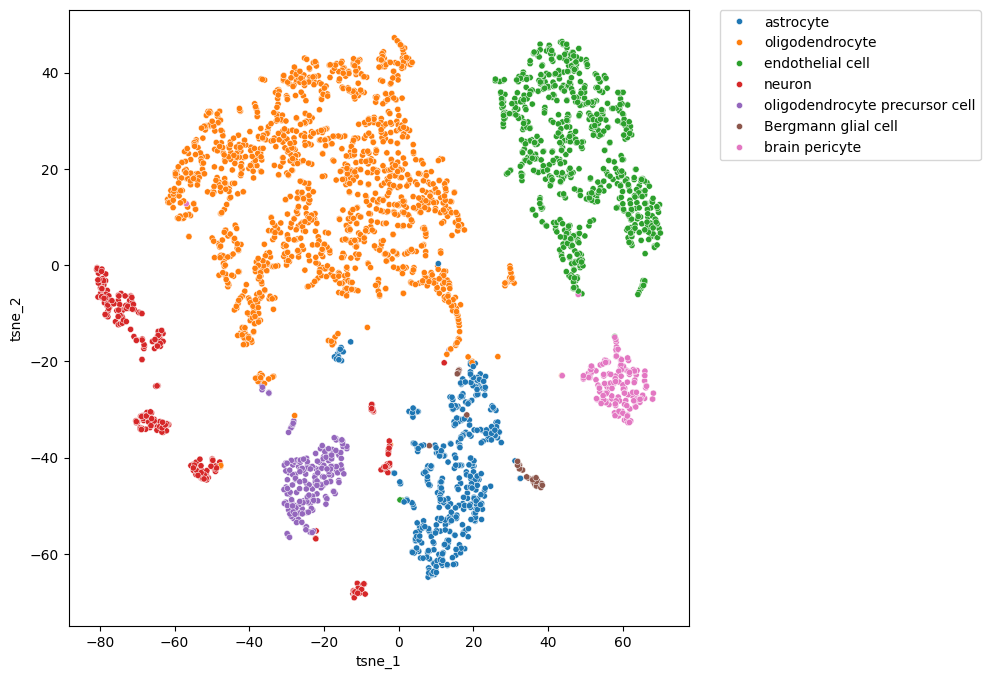

In [26]:
### Original from teacher
import seaborn as sns
df_tsne = {
    'tsne_1': X_tsne[:,0],
    'tsne_2': X_tsne[:,1],
    'label': df_meta[meta_attr]
}
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=df_tsne, ax=ax,s=20)
l = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [27]:
### original
# X_tsne = TSNE(n_components=2, init='random', learning_rate='auto', perplexity=20).fit_transform(X_pca)

### johnny modified
j_tsne = TSNE(n_components=3, init='random', learning_rate='auto', perplexity=30, max_iter=1200).fit_transform(X_pca)

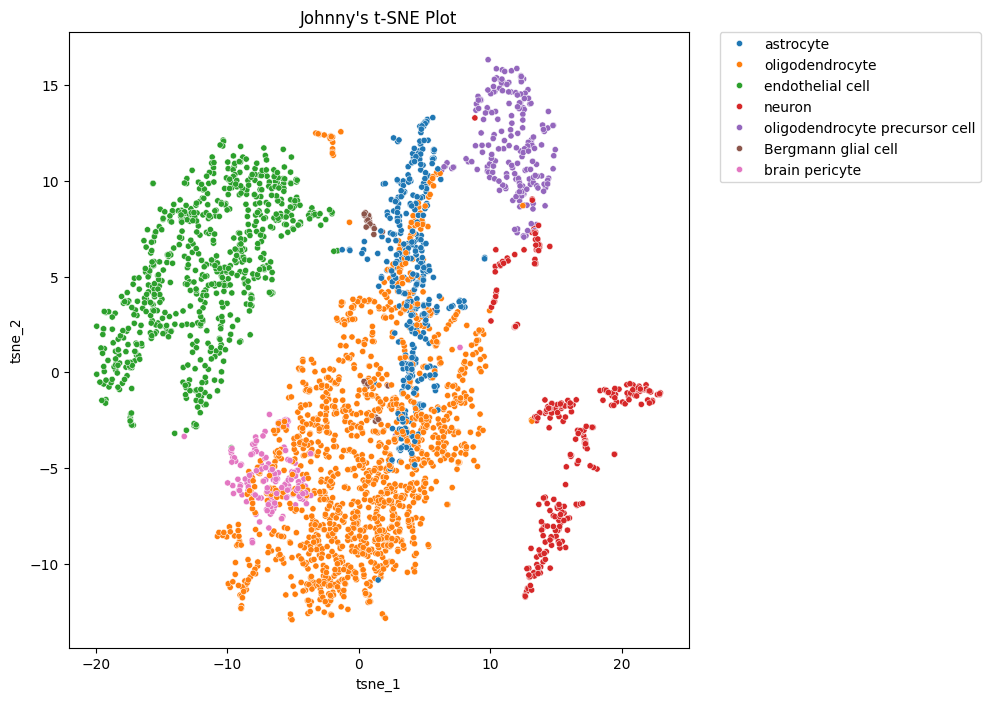

In [28]:
### Original from teacher
import seaborn as sns
df_tsne = {
    'tsne_1': j_tsne[:,0], # changed this
    'tsne_2': j_tsne[:,1], # changed this
    'label': df_meta[meta_attr]
}
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=df_tsne, ax=ax,s=20).set(title='Johnny\'s t-SNE Plot')
l = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

You can try adjusting:
- the t-SNE perplexity
- the PCA components
- the metadata coloring
- the t-SNE learning rate
- the t-SNE iterations